In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# we import the csv dataset
african_economies_df = pd.read_csv('african_economies_dataset.csv')

## EDA Analysis

In [4]:
african_economies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64472 entries, 0 to 64471
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    64472 non-null  object 
 1   indicator  64472 non-null  object 
 2   Unit       64472 non-null  object 
 3   Date       64472 non-null  int64  
 4   Value      64472 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [5]:
african_economies_df

,country,indicator,Unit,Date,Value
0,Cameroon,"Population, total",Number,1960,5.176268e+06
1,Cameroon,"Population, total",Number,1961,5.285231e+06
2,Cameroon,"Population, total",Number,1962,5.399922e+06
3,Cameroon,"Population, total",Number,1963,5.520332e+06
4,Cameroon,"Population, total",Number,1964,5.646316e+06
...,...,...,...,...,...
64467,Togo,"Gross capital formation, Private sector (curr...",Current US $,2019,9.749197e+08
64468,Togo,"Gross capital formation, Private sector (curr...",Current US $,2020,8.951734e+08
64469,Togo,"Gross capital formation, Private sector (curr...",Current US $,2021,9.726749e+08
64470,Togo,"Gross capital formation, Private sector (curr...",Current US $,2022,1.099513e+09


The dataset is not good to be used, so we modify it

In [6]:
# reseting the index
african_economies_df_new = african_economies_df.pivot_table(values='Value', index=('country','Date'), columns='indicator').reset_index()

In [7]:
african_economies_df_new.head()

indicator,country,Date,Annual growth rate of real GDP per capita (%),CO2 emissions (metric tons per capita),"Capital and financial account balance (Net, BoP, cur. US$)","Central government, Fiscal Balance (Current US $)","Central government, total expenditure and net lending (Current US $)","Consumer Price Index, Total (Annual Growth rates, %)","Consumer Price Index, in Energy (Annual Growth rates, %)","Consumer Price Index, in Food (Annual Growth rates, %)",...,"Imports of goods & services, Value (WEO, cur. US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (current US$)","Oil exports, Value (Cur. USD)","Oil imports, Value (Cur. USD)","Population, total","Public Administration and defence, value added (current US$)",Real GDP growth (annual %),"Trade balance (Net, BoP, cur. US$)","Unemployment rate, (aged 15 over) (%)"
0,Algeria,1960,NaN,0.546258,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,11124888.0,NaN,NaN,NaN,NaN
1,Algeria,1961,NaN,0.524643,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,11404859.0,NaN,NaN,NaN,NaN
2,Algeria,1962,NaN,0.478617,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,11690153.0,NaN,NaN,NaN,NaN
3,Algeria,1963,NaN,0.447181,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,11985136.0,NaN,NaN,NaN,NaN
4,Algeria,1964,NaN,0.454132,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,12295970.0,NaN,NaN,NaN,NaN


In [8]:
#since we have values from 1960 it is better to use more recent data in order to be more significant
date_mask = african_economies_df_new['Date'] > 1999
african_economies_21st_df = african_economies_df_new[date_mask]

In [9]:
african_economies_21st_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 40 to 3455
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   country                                                                1296 non-null   object 
 1   Date                                                                   1296 non-null   int64  
 2   Annual growth rate of real GDP per capita (%)                          1116 non-null   float64
 3   CO2 emissions (metric tons per capita)                                 1080 non-null   float64
 4   Capital and financial account balance (Net, BoP, cur. US$)             677 non-null    float64
 5   Central government, Fiscal Balance (Current US $)                      1269 non-null   float64
 6   Central government, total expenditure and net lending  (Current US $)  1258 non-null   float

In [10]:
#now we substitute the the NaN values with the interpolation for each country since it fits better for times series
african_economies_21st_clean_df = african_economies_21st_df.apply(lambda group: group.interpolate(method='linear'))

/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_56663/945555802.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  african_economies_21st_clean_df = african_economies_21st_df.apply(lambda group: group.interpolate(method='linear'))


In [36]:
african_economies_21st_clean_df.head()

indicator,country,Date,Annual growth rate of real GDP per capita (%),CO2 emissions (metric tons per capita),"Capital and financial account balance (Net, BoP, cur. US$)","Central government, Fiscal Balance (Current US $)","Central government, total expenditure and net lending (Current US $)","Consumer Price Index, Total (Annual Growth rates, %)","Consumer Price Index, in Energy (Annual Growth rates, %)","Consumer Price Index, in Food (Annual Growth rates, %)",...,"Imports of goods & services, Value (WEO, cur. US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (current US$)","Oil exports, Value (Cur. USD)","Oil imports, Value (Cur. USD)","Population, total","Public Administration and defence, value added (current US$)",Real GDP growth (annual %),"Trade balance (Net, BoP, cur. US$)","Unemployment rate, (aged 15 over) (%)"
40,Algeria,2000,2.39951,2.578744,-9.237316e+09,5.298978e+09,1.566972e+10,-0.622554,1.7,-0.8,...,1.170500e+10,-0.622554,3.169904e+09,2.106232e+10,0.0,30774621.0,5.338011e+09,3.521903,1.230732e+10,29.8
41,Algeria,2001,1.65966,2.500675,-7.531500e+09,1.867202e+09,1.724416e+10,3.490245,2.4,5.5,...,1.192200e+10,3.490245,3.419483e+09,1.853180e+10,0.0,31200985.0,5.988239e+09,3.000000,9.609800e+09,27.3
42,Algeria,2002,4.26208,2.586712,-4.886060e+09,2.723329e+08,1.984767e+10,1.400000,0.0,0.3,...,1.449000e+10,1.400000,3.551987e+09,1.810916e+10,0.0,31624696.0,6.157220e+09,5.640000,6.699160e+09,25.9
43,Algeria,2003,5.84091,2.733374,-8.862700e+09,3.250856e+09,2.225984e+10,2.583000,1.7,3.9,...,1.627200e+10,2.583000,3.796448e+09,2.399000e+10,0.0,32055883.0,7.016133e+09,7.240000,1.110800e+10,23.7
44,Algeria,2004,2.93450,2.737354,-1.086968e+10,4.555392e+09,2.659198e+10,3.561655,1.7,3.7,...,2.181400e+10,6.426600,4.397541e+09,3.155018e+10,0.0,32510186.0,8.163664e+09,4.340000,1.426618e+10,17.7


In [38]:
african_economies_21st_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 40 to 3455
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   country                                                                1296 non-null   object 
 1   Date                                                                   1296 non-null   int64  
 2   Annual growth rate of real GDP per capita (%)                          1296 non-null   float64
 3   CO2 emissions (metric tons per capita)                                 1296 non-null   float64
 4   Capital and financial account balance (Net, BoP, cur. US$)             1296 non-null   float64
 5   Central government, Fiscal Balance (Current US $)                      1296 non-null   float64
 6   Central government, total expenditure and net lending  (Current US $)  1296 non-null   float

In [11]:
african_groupby_mean_df = african_economies_21st_clean_df.groupby('country').mean()

In [13]:
real_gdp_per_capita_growth_sorted = african_groupby_mean_df.sort_values(by='Annual growth rate of real GDP per capita (%)',ascending=False)

## Showing some graphs

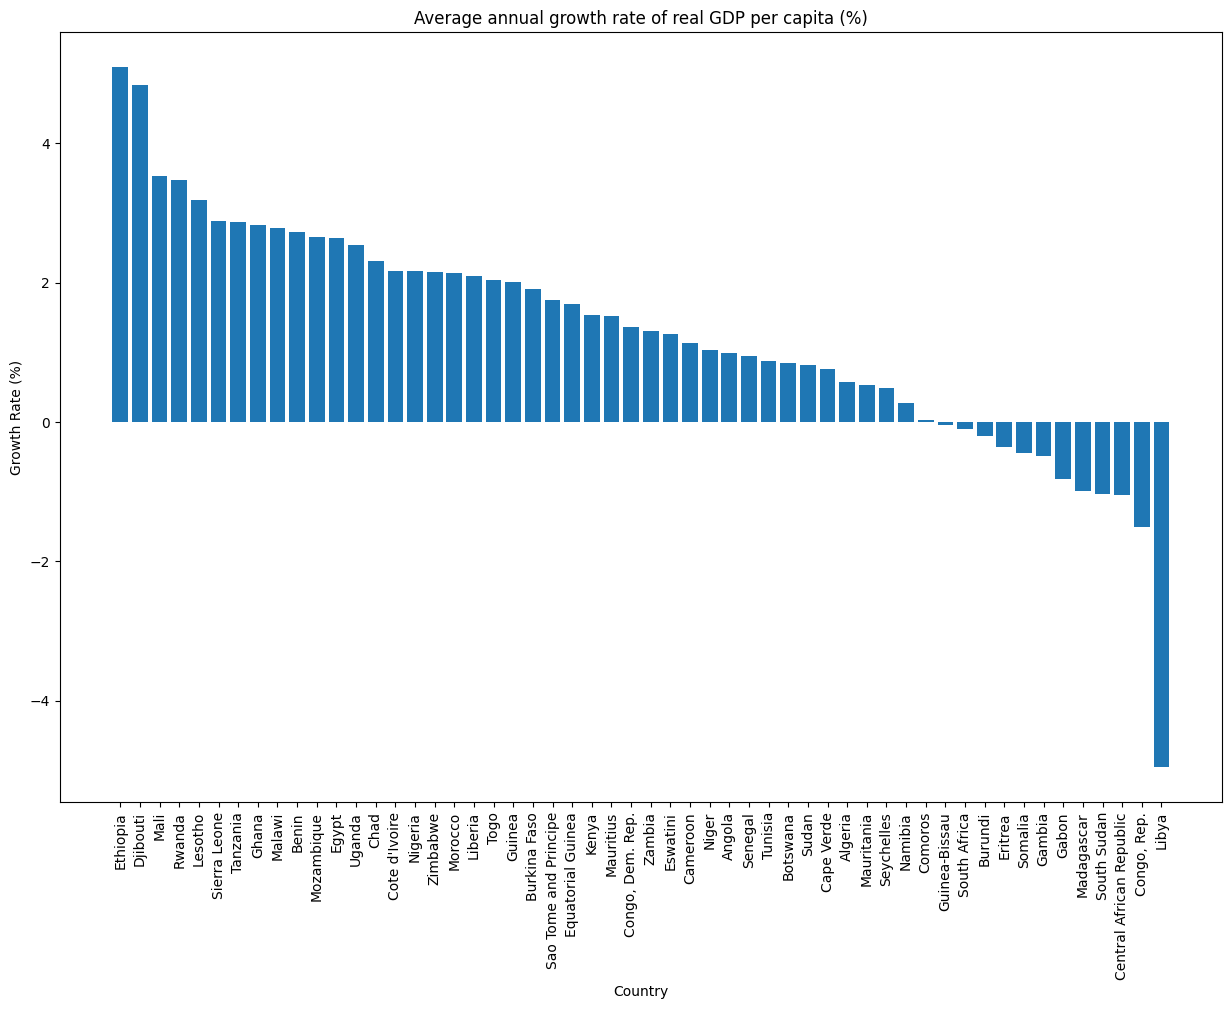

In [32]:
plt.figure(figsize=(15,10))
plt.bar(x=real_gdp_per_capita_growth_sorted.index, height=real_gdp_per_capita_growth_sorted['Annual growth rate of real GDP per capita (%)'])
plt.xticks(rotation=90)
plt.title('Average annual growth rate of real GDP per capita (%)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Country')
plt.show()

In [15]:
real_gdp_growth_sorted = african_groupby_mean_df.sort_values(by='Real GDP growth (annual %)',ascending=False)

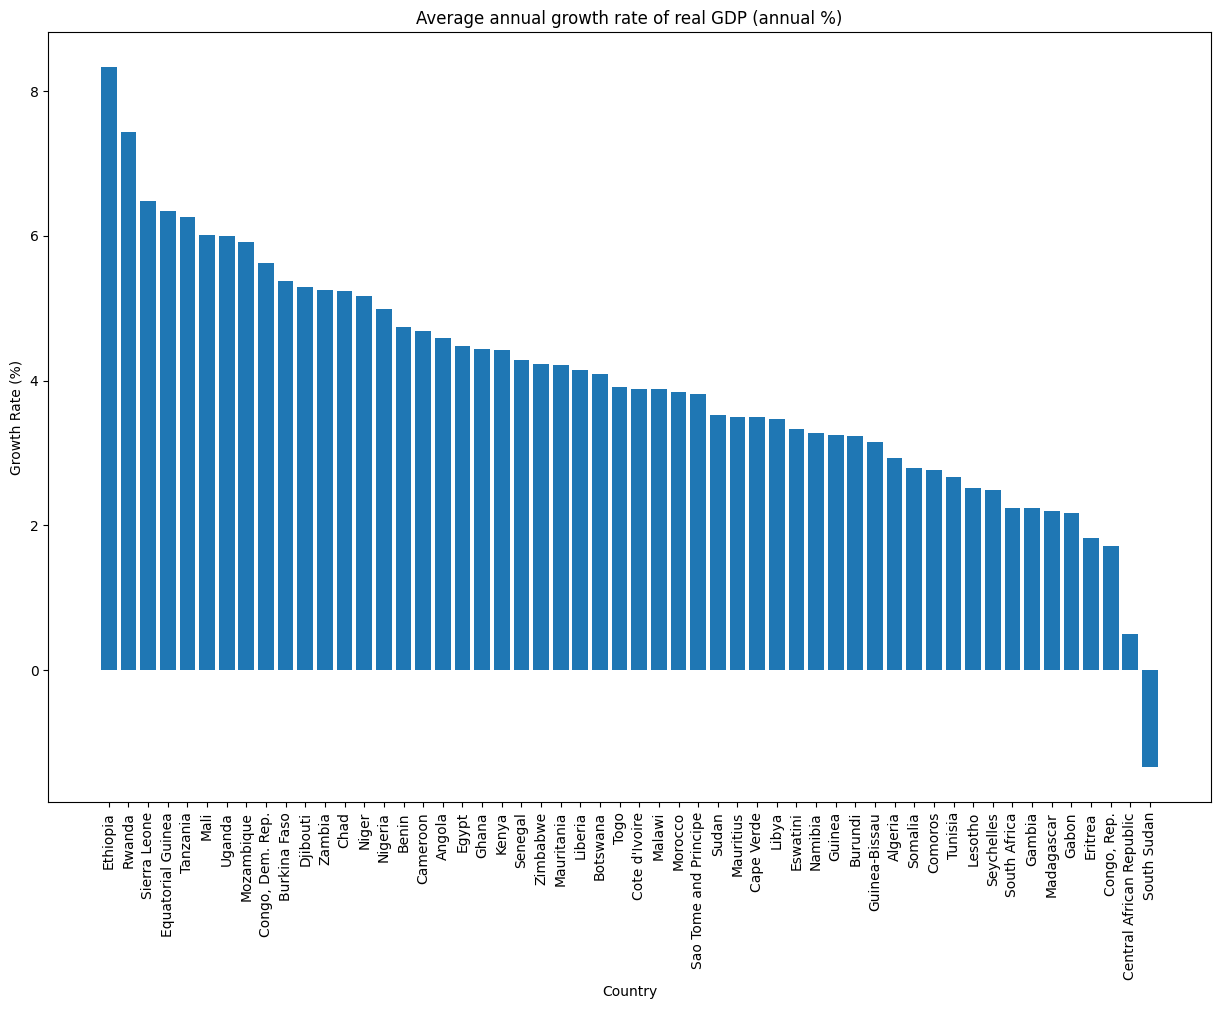

In [29]:
plt.figure(figsize=(15,10))
plt.bar(x=real_gdp_growth_sorted.index, height=real_gdp_growth_sorted['Real GDP growth (annual %)'])
plt.xticks(rotation=90)
plt.title('Average annual growth rate of real GDP (annual %)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Country')
plt.show()

Let's check how the distribution of the GDP per capita has changed through the years, comaring the years 2000 and 2023

In [58]:
mask_2000 = african_economies_21st_clean_df['Date'] == 2000
mask_2023 = african_economies_21st_clean_df['Date'] == 2023
african_economies_2000_df = african_economies_21st_clean_df[mask_2000]
african_economies_2023_df = african_economies_21st_clean_df[mask_2023]

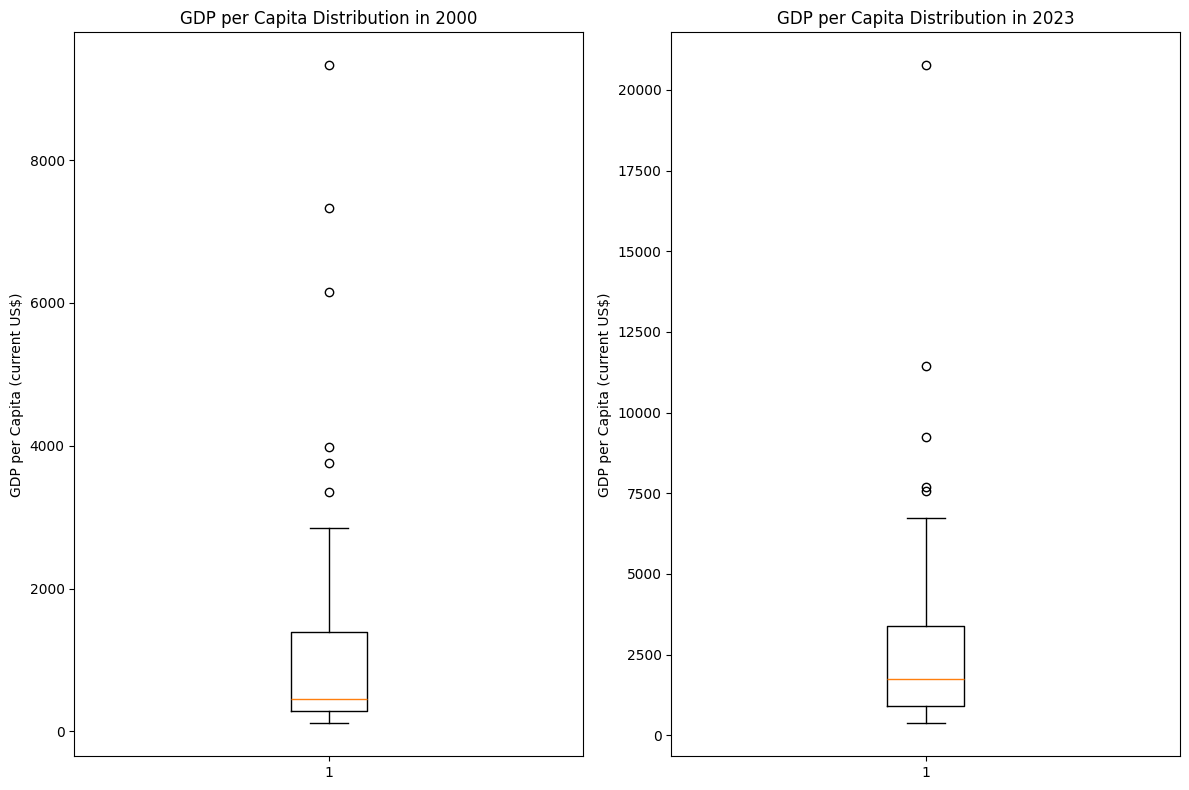

In [66]:
fig1, ax = plt.subplots(1, 2, figsize=(12, 8))  # Create an empty Figure and ax

# Subplot 1: GDP per Capita 2000
ax[0].boxplot(african_economies_2000_df['GDP per capita,(current US$)'])
# Set the title and labels of the plot
ax[0].set_title('GDP per Capita Distribution in 2000')
ax[0].set_ylabel('GDP per Capita (current US$)')

# Subplot 2: GDP per Capita 2023
ax[1].boxplot(african_economies_2023_df['GDP per capita,(current US$)'])
# Set the title and labels of the plot
ax[1].set_title('GDP per Capita Distribution in 2023')
ax[1].set_ylabel('GDP per Capita (current US$)')

plt.tight_layout() 
plt.show()

It can bee seen an important increase on the overall GDP per capita distribution, 

Ethiopia shows the greatest growth in both trends, so now we want to analyse into more specific the country to see what influences this good trend

In [23]:
ethiopia_mask = african_economies_21st_clean_df['country'] == 'Ethiopia'

In [24]:
ethiopia_df = african_economies_21st_clean_df[ethiopia_mask]

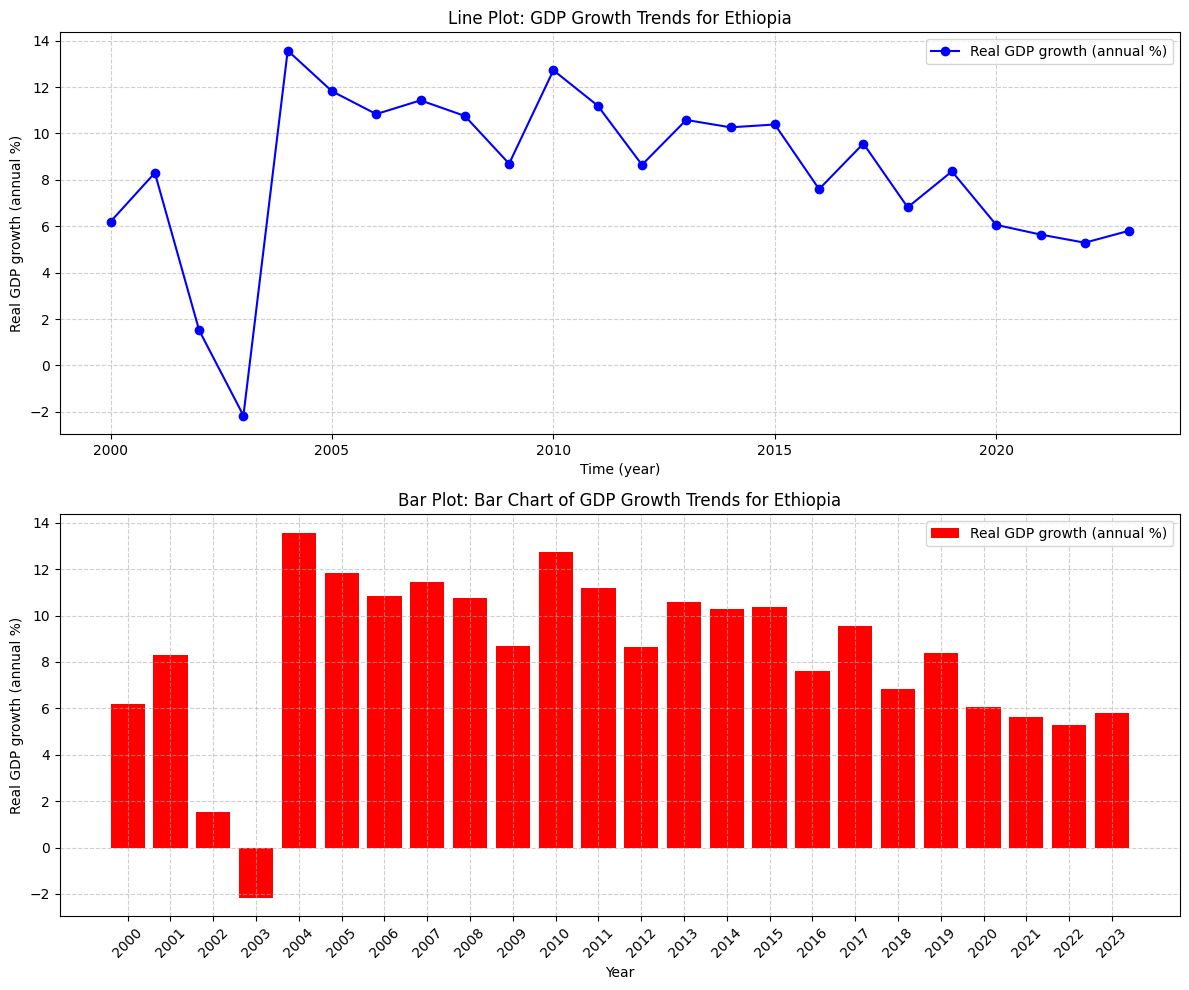

In [42]:
fig1, ax = plt.subplots(2, 1, figsize=(12, 10))  # Create an empty Figure and ax

# Subplot 1: Line plot
ax[0].plot(ethiopia_df['Date'], ethiopia_df['Real GDP growth (annual %)'], color='blue', label='Real GDP growth (annual %)', linestyle='-', marker='o')
ax[0].set_xlabel('Time (year)')
ax[0].set_ylabel('Real GDP growth (annual %)')
ax[0].set_title('Line Plot: GDP Growth Trends for Ethiopia')
ax[0].grid(linestyle='--', alpha=0.6)
ax[0].legend()

# Subplot 2: Bar chart 
ax[1].bar(ethiopia_df['Date'], ethiopia_df['Real GDP growth (annual %)'], alpha=1, color='red', label='Real GDP growth (annual %)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Real GDP growth (annual %)')
ax[1].set_title('Bar Plot: Bar Chart of GDP Growth Trends for Ethiopia')
ax[1].grid(linestyle='--', alpha=0.6)
ax[1].set_xticks(ethiopia_df['Date'])
ax[1].set_xticklabels(ethiopia_df['Date'], rotation=45)
ax[1].legend()
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()